In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from astropy.io import fits
from sklearn.tree import DecisionTreeRegressor
import glob
from astropy import units as u
from sklearn.linear_model import LinearRegression


In [2]:
#Glob away all the fits in a dir
fits_list =glob.glob("*.fits")
print(fits_list)

#Extra the fits tables from all the globbed fits
specdata_list=[]
for i in fits_list:
    with fits.open(i) as fit_file:
        specdata=fit_file[1].data
        header=fit_file[0].header
        specdata_list.append(specdata)


#Get the shapes of each spectra then find the smallest shape along 0 axis
spec_shape_list=[]
for i in specdata_list:
    print(i.shape)
    spec_shape_list.append(i.shape)

spec_shape_list=np.array(spec_shape_list)
smallest_spec=np.min(spec_shape_list)


#Performing filtering of the spectra along lambda axis as data is not recording properly from first lambda
#to last lambda, as in some spectra the measurements start from different first to different last lambda
spectra_filtered_list=[]
for i in specdata_list:
    spec=i
    #apply booleam mask along lambda axis from 3.562 to 3.957 lambdas
    mask = (spec.loglam >= 3.582) & (spec.loglam <= 3.957)
    filtered_data = spec[mask]
    spectra_filtered_list.append(filtered_data)
#And here we have a np array containing individual spectras
spectra_filtered_list=np.array(spectra_filtered_list)
spectra_filtered_list.shape


# Use the row index (fiber index) as the feature, and the spectra as the target
spectra_filtered_list_array=np.array(spectra_filtered_list['sky'])
indices= np.arange(spectra_filtered_list_array.shape[0]).reshape(-1,1)
#x_train, x_test=train_test_split(spectra_filtered_list_array, test_size=0.1, random_state=42)

['spec-1678-53433-0001.fits', 'spec-1678-53433-0425.fits', 'spec-0548-51986-0020.fits', 'spec-0548-51986-0001.fits']
(3822,)
(3846,)
(3828,)
(3769,)


In [5]:
linreg=LinearRegression()
linreg.fit(indices, spectra_filtered_list_array)

#Generate the master sky from prediction
master_sky=linreg.predict( np.array(indices.shape[0]).reshape(-1,1))

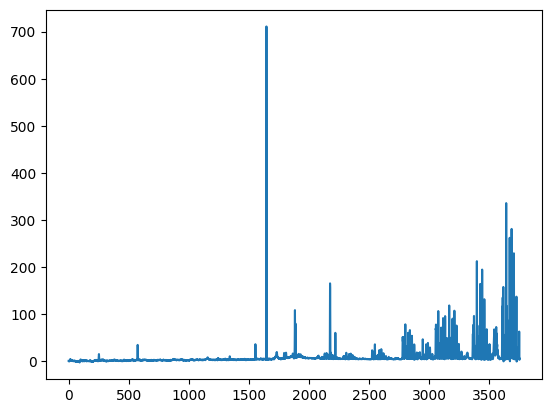

In [7]:
plt.plot(master_sky[0])

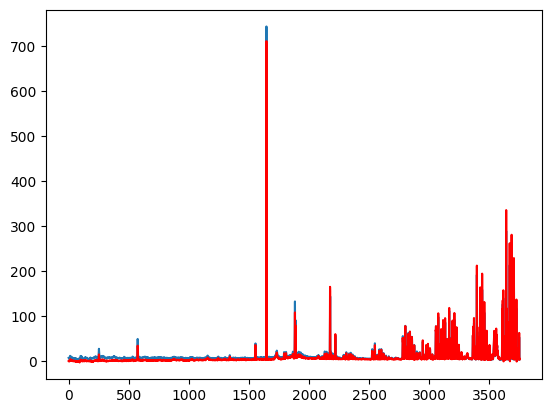

In [9]:
#Unscaled master sky spectrum
plt.plot(spectra_filtered_list[2]['sky'])
plt.plot(master_sky[0], c='r')



In [17]:
#scaling the master sky to the science spectra
ref_master= master_sky[0][2500:3750]
ref_sky=spectra_filtered_list['sky'][:,2500:3750]

scaling=np.mean(ref_sky/ref_master)
print(scaling)

master_scaled= master_sky[0]*scaling

1.162593942905943


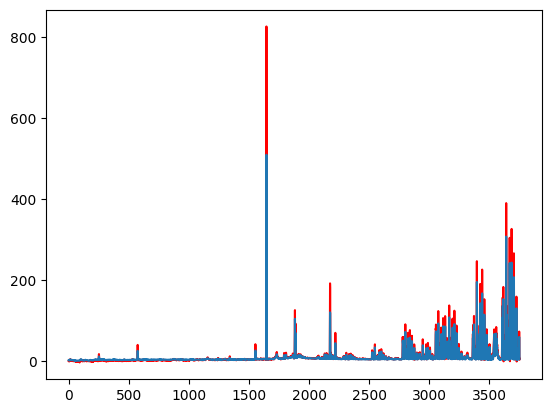

In [21]:
#scaling plots comparison
plt.plot(master_scaled, c='r')

plt.plot(spectra_filtered_list[3]['sky'])



